In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import re
        
from sklearn.feature_extraction.text import CountVectorizer

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myanimelist-dataset-animes-profiles-reviews/animes.csv
/kaggle/input/myanimelist-dataset-animes-profiles-reviews/profiles.csv
/kaggle/input/myanimelist-dataset-animes-profiles-reviews/reviews.csv


In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [123]:
df = pd.read_csv('../input/myanimelist-dataset-animes-profiles-reviews/reviews.csv')

In [124]:
df.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


In [126]:
df = df.loc[0:3000]

In [127]:
df['text'][0]

'\n           \n         \n           \n             \n           \n         \n         \n           more pics \n         \n       \n         \n       \n         \n           Overall \n           8 \n         \n         \n           Story \n           8 \n         \n                   \n             Animation \n             8 \n           \n           \n             Sound \n             10 \n           \n                 \n           Character \n           9 \n         \n         \n           Enjoyment \n           8 \n         \n       \n     \n\n                    \n    First things first. My "reviews" system is explained on a blog entry. Which can be found through my profile. \r\n------ \r\n \r\nI\'m going to keep this "review" more of a opinion of Gintama\'s overall and then this season specific. \r\n \r\nAnyhow. What I have always loved regarding Gintama, is its content of everything. I love the comedy, its absurd, random, can be vile, dirty, sweet, anyhow, everything. Have laugh

In [128]:
uid = 255938
text = df[df['uid'] == uid].text.values[0]
def clean_up_text(text):
    doc = re.sub("[\(\[].*?[\)\]]", "", text)
    doc = doc.replace(u'\n', u'').replace(u'\r', u'')
    return doc

doc = clean_up_text(text)
print(doc)

                                                                                    more pics                                                     Overall            8                              Story            8                                          Animation              8                                    Sound              10                                        Character            9                              Enjoyment            8                                              First things first. My "reviews" system is explained on a blog entry. Which can be found through my profile. ------  I'm going to keep this "review" more of a opinion of Gintama's overall and then this season specific.  Anyhow. What I have always loved regarding Gintama, is its content of everything. I love the comedy, its absurd, random, can be vile, dirty, sweet, anyhow, everything. Have laughed countless times in this franchise. Also the humor they have also is heavily reference based, a.k.a par

In [129]:
df['cleanText'] = df['text'].map(lambda x: clean_up_text(x))
df.head()

,uid,profile,anime_uid,text,score,scores,link,cleanText
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,...
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,...
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,...
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254,...
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149,...


In [130]:
df['cleanText'][0]

'                                                                                    more pics                                                     Overall            8                              Story            8                                          Animation              8                                    Sound              10                                        Character            9                              Enjoyment            8                                              First things first. My "reviews" system is explained on a blog entry. Which can be found through my profile. ------  I\'m going to keep this "review" more of a opinion of Gintama\'s overall and then this season specific.  Anyhow. What I have always loved regarding Gintama, is its content of everything. I love the comedy, its absurd, random, can be vile, dirty, sweet, anyhow, everything. Have laughed countless times in this franchise. Also the humor they have also is heavily reference based, a.k.a 

In [131]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon") # https://www.kaggle.com/datasets/nltkdata/vader-lexicon

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [132]:
sentiments = SentimentIntensityAnalyzer()

df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["cleanText"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["cleanText"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["cleanText"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["cleanText"]]
df.head()

,uid,profile,anime_uid,text,score,scores,link,cleanText,Positive,Negative,Neutral,Compound
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,...,0.218,0.096,0.686,0.9984
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,...,0.192,0.083,0.725,0.9989
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,...,0.200,0.050,0.749,0.9871
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254,...,0.137,0.086,0.777,0.9965
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149,...,0.220,0.056,0.724,0.9965


In [142]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,uid,profile,anime_uid,text,score,scores,link,cleanText,Positive,Negative,Neutral,Compound,Sentiment
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,...,0.218,0.096,0.686,0.9984,Positive
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,...,0.192,0.083,0.725,0.9989,Positive
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,...,0.200,0.050,0.749,0.9871,Positive
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254,...,0.137,0.086,0.777,0.9965,Positive
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149,...,0.220,0.056,0.724,0.9965,Positive


In [143]:
df["Sentiment"].value_counts()

Positive    2793
Negative     206
Neutral        2
Name: Sentiment, dtype: int64

In [100]:
df.to_csv("reviews_animes_labels.csv")

In [145]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=1)

t_1 = train[train['Sentiment']=='Neutral'].sample(800,replace=True)
t_2 = train[train['Sentiment']=='Positive'].sample(800,replace=True)
t_3 = train[train['Sentiment']=='Negative'].sample(800,replace=True)
training_bs = pd.concat([t_1, t_2, t_3])

In [147]:
print(train.shape)
print(training_bs.shape)
print(test.shape)

(2100, 13)
(2400, 13)
(901, 13)


In [148]:
train['Sentiment'].value_counts()

Positive    1957
Negative     142
Neutral        1
Name: Sentiment, dtype: int64

In [149]:
test['Sentiment'].value_counts()

Positive    836
Negative     64
Neutral       1
Name: Sentiment, dtype: int64

In [150]:
# sanity check 
df.shape[0] == (train.shape[0] + test.shape[0])

True

Baseline Accuracy
The baseline accuracy is the proportion of the majority class. Before bootstrapping ‘2’ which is positive sentiment gives us the baseline at 0.7. After Bootstrapping all the classes the accuracy to predict each of the classes balances so the baseline accuracy is 0.3 for each class.

In [153]:
print(train['Sentiment'].value_counts(normalize=True))
baseline = 0.3

Positive    0.931905
Negative    0.067619
Neutral     0.000476
Name: Sentiment, dtype: float64


In [154]:
print (training_bs['Sentiment'].value_counts(normalize=True))
baseline = 0.3

Neutral     0.333333
Positive    0.333333
Negative    0.333333
Name: Sentiment, dtype: float64


In [157]:
# reset index before saving
training_bs = training_bs.reset_index(drop=True)
training_bs.to_csv('training_bs.csv', header=True, index=False, encoding='UTF8')
test = test.reset_index(drop=True)
test.to_csv('testing.csv', header=True, index=False, encoding='UTF8')

In [158]:
# Define Class Integer Values
cleanup_nums = {"Sentiment": {"Negative": 1, "Neutral": 2, "Positive": 3}}

# Replace the Classes with Integer Values
training_bs.replace(cleanup_nums, inplace=True)

# Clean the Test Data
test.replace(cleanup_nums, inplace=True)

# Create a Feature based on Text Length
training_bs['text_length'] = training_bs['cleanText'].str.len() # Store string length of each sample
training_bs = training_bs.sort_values(['text_length'], ascending=True)
training_bs

,uid,profile,anime_uid,text,score,scores,link,cleanText,Positive,Negative,Neutral,Compound,Sentiment,text_length
1276,20267,cobrascope,468,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '0', 'Animation': '0...",https://myanimelist.net/reviews.php?id=20267,...,0.331,0.041,0.628,0.8921,3,650
1071,20267,cobrascope,468,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '0', 'Animation': '0...",https://myanimelist.net/reviews.php?id=20267,...,0.331,0.041,0.628,0.8921,3,650
1214,34279,heatherbear,3092,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=34279,...,0.352,0.115,0.533,0.9241,3,664
1398,34279,heatherbear,3092,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=34279,...,0.352,0.115,0.533,0.9241,3,664
927,21907,Midori84hua,322,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=21907,...,0.491,0.000,0.509,0.9832,3,739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,205586,BanjoTheBear,28999,\n \n \n \n ...,3,"{'Overall': '3', 'Story': '0', 'Animation': '0...",https://myanimelist.net/reviews.php?id=205586,...,0.110,0.121,0.768,-0.9966,1,23954
2312,205586,BanjoTheBear,28999,\n \n \n \n ...,3,"{'Overall': '3', 'Story': '0', 'Animation': '0...",https://myanimelist.net/reviews.php?id=205586,...,0.110,0.121,0.768,-0.9966,1,23954
1764,205586,BanjoTheBear,28999,\n \n \n \n ...,3,"{'Overall': '3', 'Story': '0', 'Animation': '0...",https://myanimelist.net/reviews.php?id=205586,...,0.110,0.121,0.768,-0.9966,1,23954
2261,205586,BanjoTheBear,28999,\n \n \n \n ...,3,"{'Overall': '3', 'Story': '0', 'Animation': '0...",https://myanimelist.net/reviews.php?id=205586,...,0.110,0.121,0.768,-0.9966,1,23954


Text(0, 0.5, 'Labels')

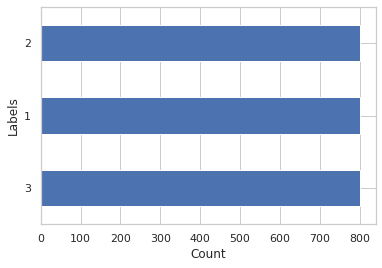

In [161]:
sns.set_theme(style="whitegrid")
ax = training_bs['Sentiment'].value_counts(sort=False).plot(kind='barh', color='b')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

Text(0, 0.5, 'Labels')

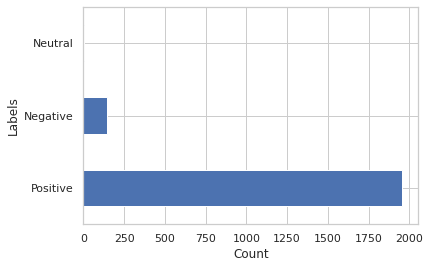

In [163]:
sns.set_theme(style="whitegrid")
ax = train['Sentiment'].value_counts(sort=False).plot(kind='barh', color='b')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Create a pipeline which transforms phrases into normalized feature vectors and uses a bayes estimator
model_name = 'bayes classifier'

pipeline_bayes = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('gnb', MultinomialNB()),
                ])

# Train model using the created sklearn pipeline
model_bayes = pipeline_bayes.fit(training_bs['cleanText'], training_bs['Sentiment'])

In [179]:
testphrases = ['Mondays just suck!', 'I love this product', 'That is a tree', 'Terrible service']
for testphrase in testphrases:
    resultx = model_bayes.predict([testphrase]) # use model_bayes for predictions with the other model
    dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
    print(testphrase + '-> ' + dict[resultx[0]])

Mondays just suck!-> Negative
I love this product-> Positive
That is a tree-> Positive
Terrible service-> Negative


In [196]:
dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
test = "Anyhow. What I have always loved regarding Gintama, is its content of everything. I love the comedy, its absurd, random, can be vile, dirty, sweet, anyhow, everything. Have laughed countless times in this franchise. Also the humor they have also is heavily reference based, a.k.a parodies of different anime, shows, manga, live stuff, real world, anime production and so on. Anyhow, comedy/parody side of this franchise i absolutely love.  Now, 2nd side of this show is the serious dramas, epic battle shounens and so on.. There are arcs that are fully comedy, arcs that are fully serious and mixtures of both. Serious side is usually quite dramatic and managed to somewhat tear me up now and then. Whilst the action sequences are absolute bliss as well. They are just presented in a really cool manner. And extra points when sometime the add artistic element.  Of course it has its slice-of-life side and pseudo-romance. Those are weaker side, but ain't the focus. But when sometimes those are the 'focus', then they are done in enjoyable method.  To sum up overall gintama's, I love the serious side and the silly side.  Art and sound  is something I loved in all gintamas across the board. They just click with me, bliss to look at, bliss to hear. Music  specifically are hyped up and upbeat, which generally I don't like, but gintama is the exception where I love them. Art is cool, sometimes artistic, sometimes simple. It has a bit of everything that makes it enjoyable. And gore is absolutely satisfying as well.   Well, the serious side of stories in this anime are superb in my opinion. . But wouldn't say comedic side of series story is any worse.  When at times comedy side has 'story'. It's usually quite enjoyable.  Regarding characters I don't have much to say other than that variety, stereotypes of 'off-stereotypes' is very large. As well characters with depth but as well with oddity is as well in great selection. Main team. Gintoki the lazy dirty slob with superb second side of seriousness and caring about friends/allies. Shinpachi the poor straight-man-act sidekick, who adds great value to the team. Kagura, the battle race girl that doesn't act like girl almost at all, or in another words a dirty slob girl in a sense. -----------------  Now, to this season specific.  I found it a bit disappointing. Mainly because usually in gintama we have overly serious arcs or fully comedic, whilst this one had a bit of mixture of both, which somewhat ruined the experience. Plus the artistic presentation felt this time around a bit lacking. Maybe because of another studio, who knows. But anyhow, it didn't feel as superb. Rather than gintama it felt as watching just another good battle shounen anime in modern day with simplified animation.  I mean it definitely was not any bad, just didn't have the punch Gintama usually has. Might be because it was short series, maybe because it focused too much moving on with story. It'll be shame to see it finalized in this manner.  Rest I pretty much loved as usual in Gintama franchise."
r = model_bayes.predict([test])
print(test + '-> ' + dict[r[0]])

Anyhow. What I have always loved regarding Gintama, is its content of everything. I love the comedy, its absurd, random, can be vile, dirty, sweet, anyhow, everything. Have laughed countless times in this franchise. Also the humor they have also is heavily reference based, a.k.a parodies of different anime, shows, manga, live stuff, real world, anime production and so on. Anyhow, comedy/parody side of this franchise i absolutely love.  Now, 2nd side of this show is the serious dramas, epic battle shounens and so on.. There are arcs that are fully comedy, arcs that are fully serious and mixtures of both. Serious side is usually quite dramatic and managed to somewhat tear me up now and then. Whilst the action sequences are absolute bliss as well. They are just presented in a really cool manner. And extra points when sometime the add artistic element.  Of course it has its slice-of-life side and pseudo-romance. Those are weaker side, but ain't the focus. But when sometimes those are the '

In [ ]:
from joblib import dump, load
dump(model_bayes, 'filename.joblib') 

In [ ]:
!pip install gradio

In [ ]:
from joblib import dump, load
import gradio as gr

# Load the model
model_bayes = load('filename.joblib')

# Prediction function
def make_prediction(user_sentence):
  
  prediction = model_bayes.predict([user_sentence])
  dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
  return dict[prediction[0]]

title = "Sentiment Analysis MyAnimeList Reviews"
description = "<p style='text-align: center'>Identifier si un commentaire dans MyAnimeList est positif, neutre ou négatif.<br/> Permet de connaître rapidement le sentiment globale que dégage un avis sur le site.</p>"
examples = ["I liked this show but now I do not love this since the last season. The animation is terrible and the drawings are awful. I don't recommend this show to anyone.", "This is amazing !"]

app = gr.Interface(fn=make_prediction, title=title, description=description, examples=examples, inputs=gr.TextArea(), outputs=gr.Label(num_top_classes=3))

app.launch(share=True)